In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utilities.utils import getDf

In [3]:
df_augmentation = getDf('../../data/augmentation')
df_no_augmentation = getDf('../../data/no_augmentation')
display(df_augmentation.head(5))
display(df_no_augmentation.head(5))

,number_img,disease,disease_family,healthy,specie
Strawberry___healthy,1000,healthy,healthy,True,strawberry
Grape___Black_rot,1180,black_rot,rot,False,grape
Potato___Early_blight,1000,early_blight,blight,False,potato
Blueberry___healthy,1502,healthy,healthy,True,blueberry
Cherry___Powdery_mildew,1052,powdery_mildew,mildew,False,cherry


,number_img,disease,disease_family,healthy,specie
Strawberry___healthy,456,healthy,healthy,True,strawberry
Grape___Black_rot,1180,black_rot,rot,False,grape
Potato___Early_blight,1000,early_blight,blight,False,potato
Blueberry___healthy,1502,healthy,healthy,True,blueberry
Cherry___Powdery_mildew,1052,powdery_mildew,mildew,False,cherry


# Healthy repartition

Text(0.5, 1.0, 'with augmentation')

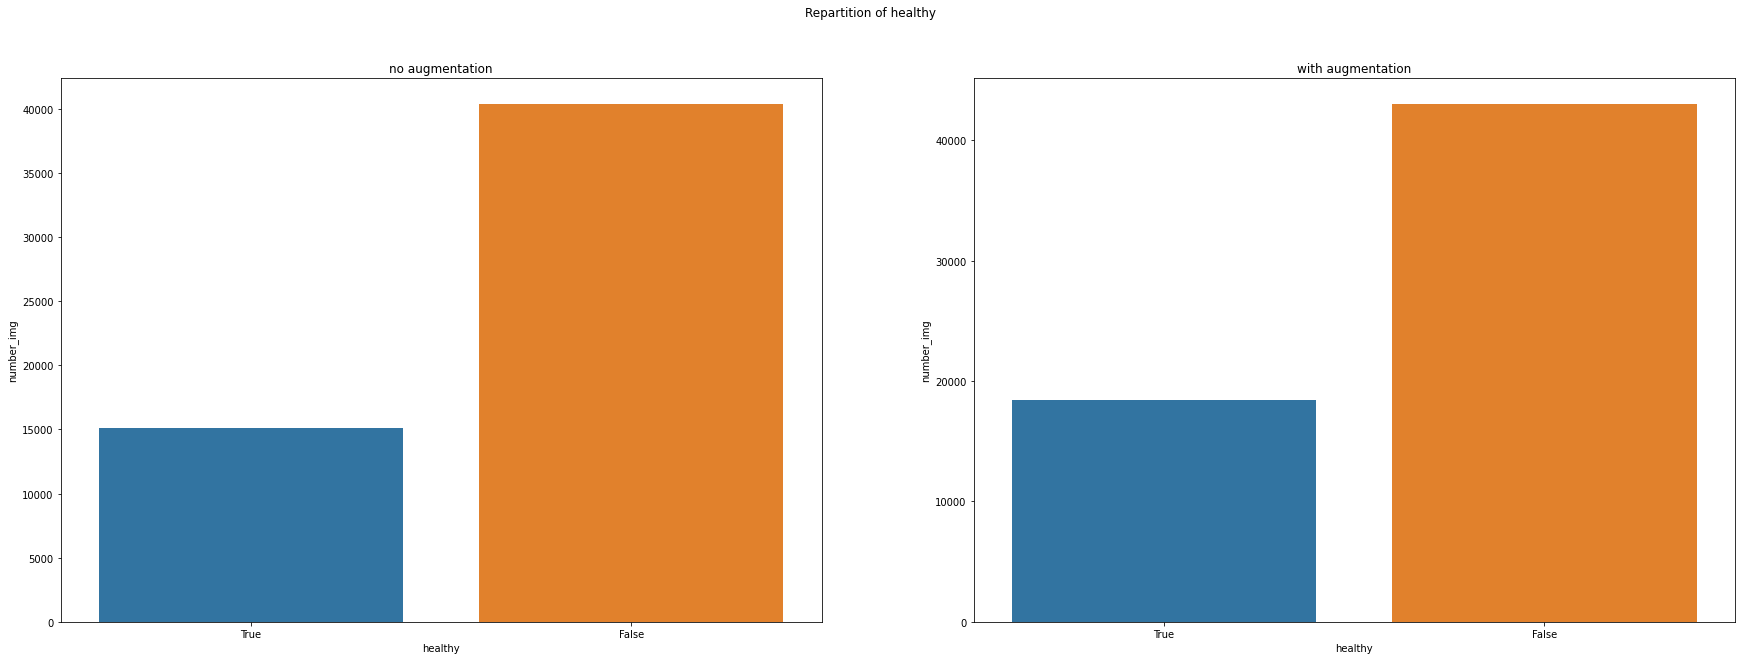

In [4]:
df_no_healthy = df_no_augmentation.copy()
df_no_healthy.healthy = df_no_healthy.healthy.astype(str)
df_no_healthy = df_no_healthy.groupby(by='healthy').sum()
df_no_healthy.reset_index(inplace=True)
df_no_healthy = df_no_healthy.sort_values('healthy', ascending=False)

df_healthy = df_augmentation.copy()
df_healthy.healthy = df_healthy.healthy.astype(str)
df_healthy = df_healthy.groupby(by='healthy').sum()
df_healthy.reset_index(inplace=True)
df_healthy = df_healthy.sort_values('healthy', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Repartition of healthy')

sns.barplot(ax=axes[0], y="number_img", x="healthy", data=df_no_healthy)
sns.barplot(ax=axes[1], y="number_img", x="healthy", data=df_healthy)

axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

Text(0.5, 1.0, 'with augmentation')

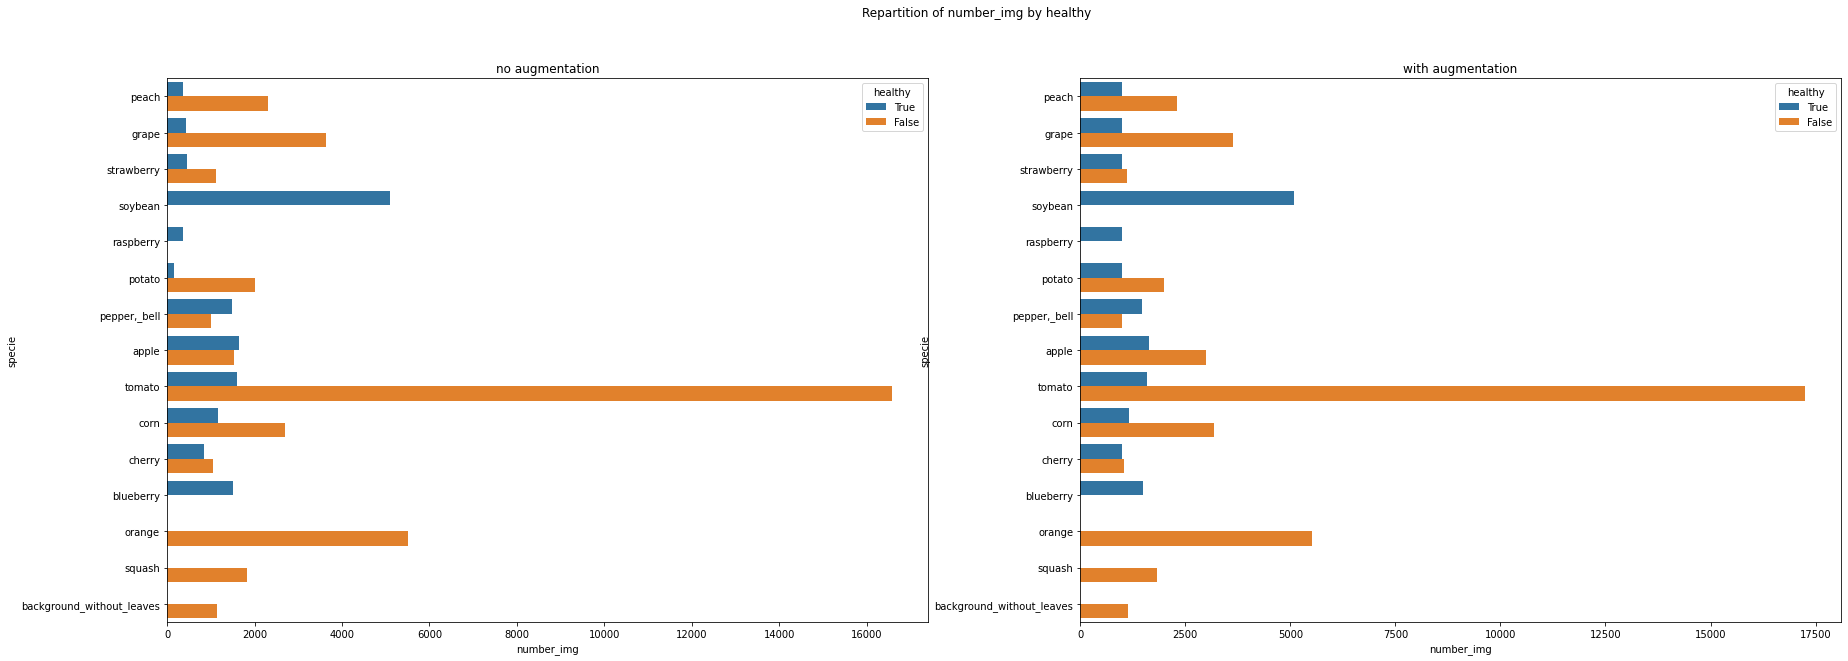

In [5]:
df_no_aug_health = df_no_augmentation.copy()
df_no_aug_health.healthy = df_no_aug_health.healthy.astype(str)
df_no_aug_health = df_no_aug_health.groupby(['specie', 'healthy']).sum()
df_no_aug_health.reset_index(inplace=True)
df_no_aug_health = df_no_aug_health.sort_values('healthy', ascending=False)

df_aug_health = df_augmentation.copy()
df_aug_health.healthy = df_aug_health.healthy.astype(str)
df_aug_health = df_aug_health.groupby(['specie', 'healthy']).sum()
df_aug_health.reset_index(inplace=True)
df_aug_health = df_aug_health.sort_values('healthy', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Repartition of number_img by healthy')

sns.barplot(ax=axes[0], x="number_img", y="specie", hue="healthy", data=df_no_aug_health)
sns.barplot(ax=axes[1], x="number_img", y="specie", hue="healthy", data=df_aug_health)
axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

- `squash, orange` have no healthy directory.
- `soybean, raspberry blueberry` have no disease directory.

# Disease repartition

'For tomato'

,no_augmentation,augmentation
max,5357,5357
min,373,1000
difference,4984,4357


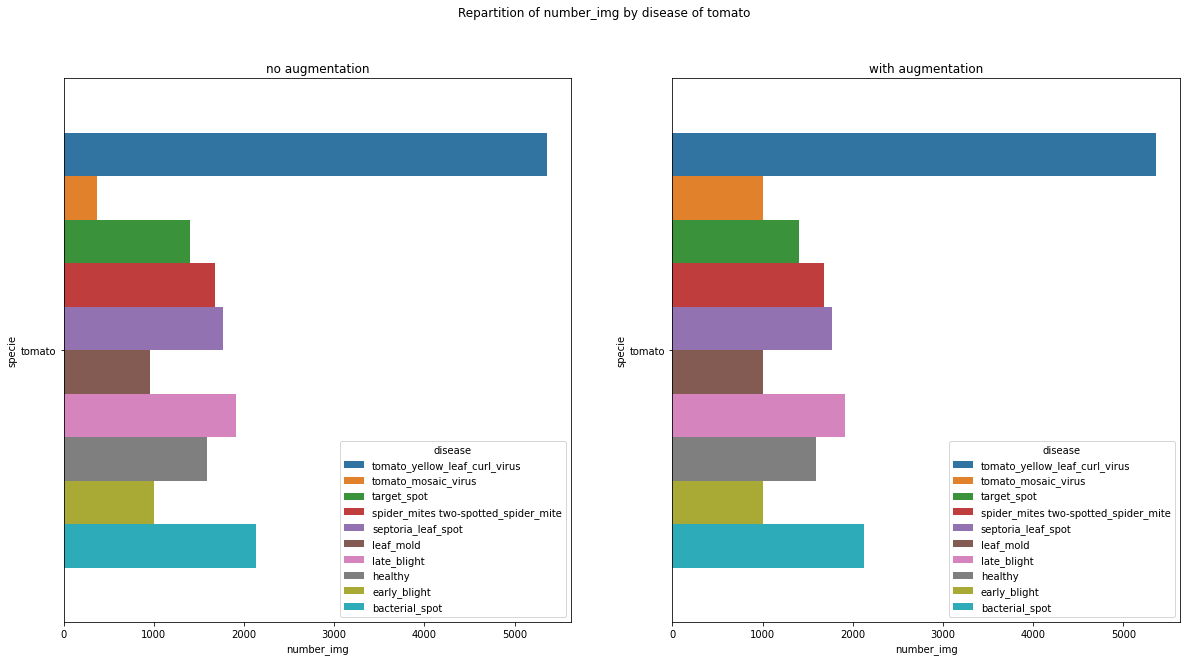

'For cherry'

,no_augmentation,augmentation
max,1052,1052
min,854,1000
difference,198,52


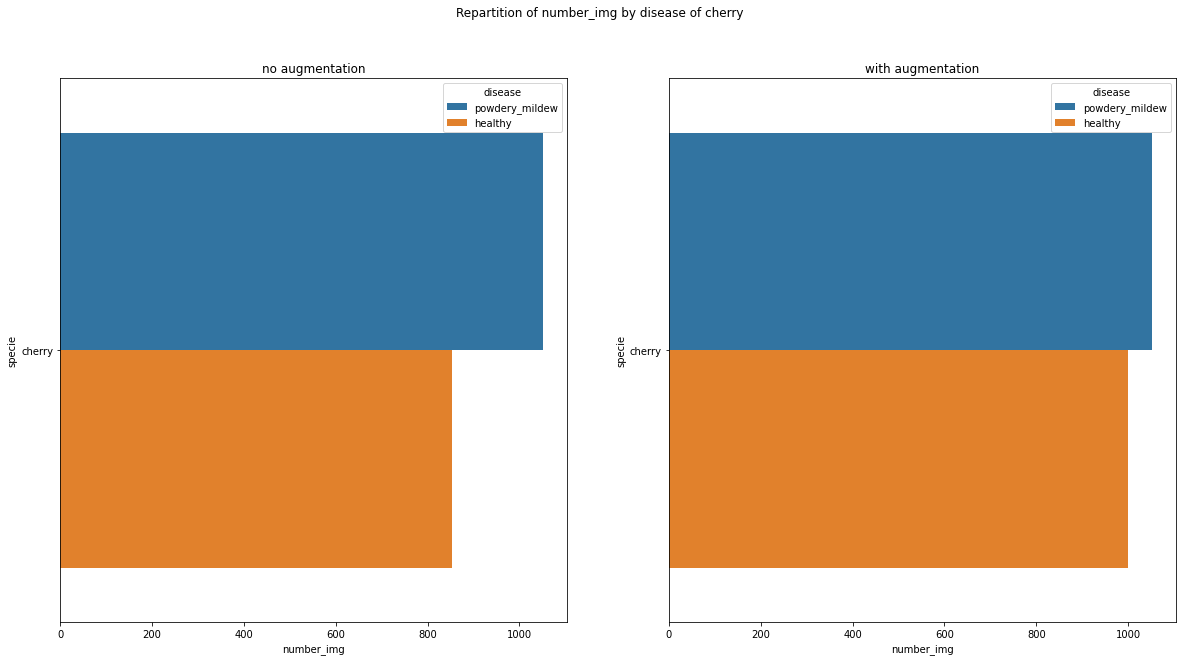

'For corn'

,no_augmentation,augmentation
max,1192,1192
min,513,1000
difference,679,192


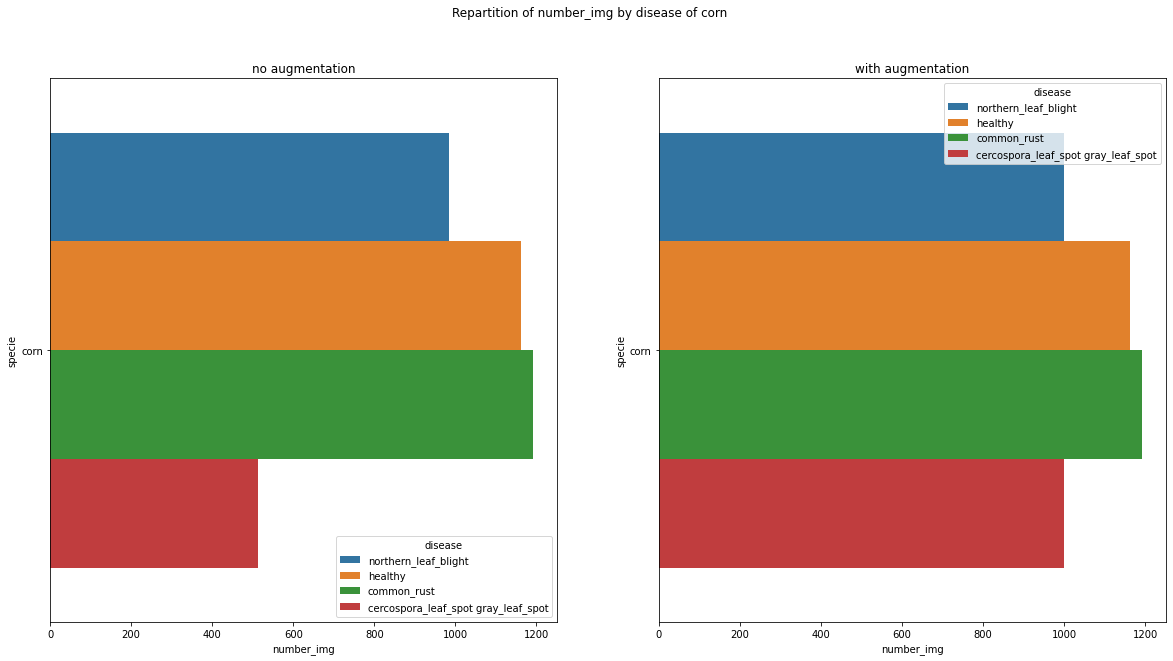

'For strawberry'

,no_augmentation,augmentation
max,1109,1109
min,456,1000
difference,653,109


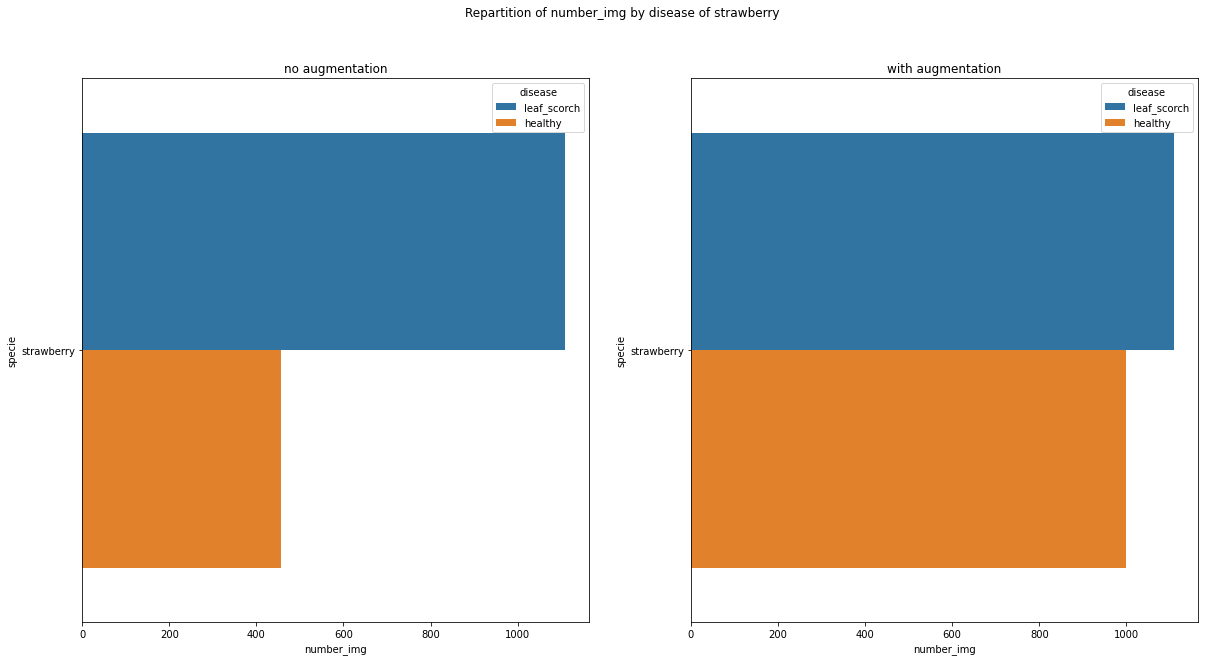

'For grape'

,no_augmentation,augmentation
max,1383,1383
min,423,1000
difference,960,383


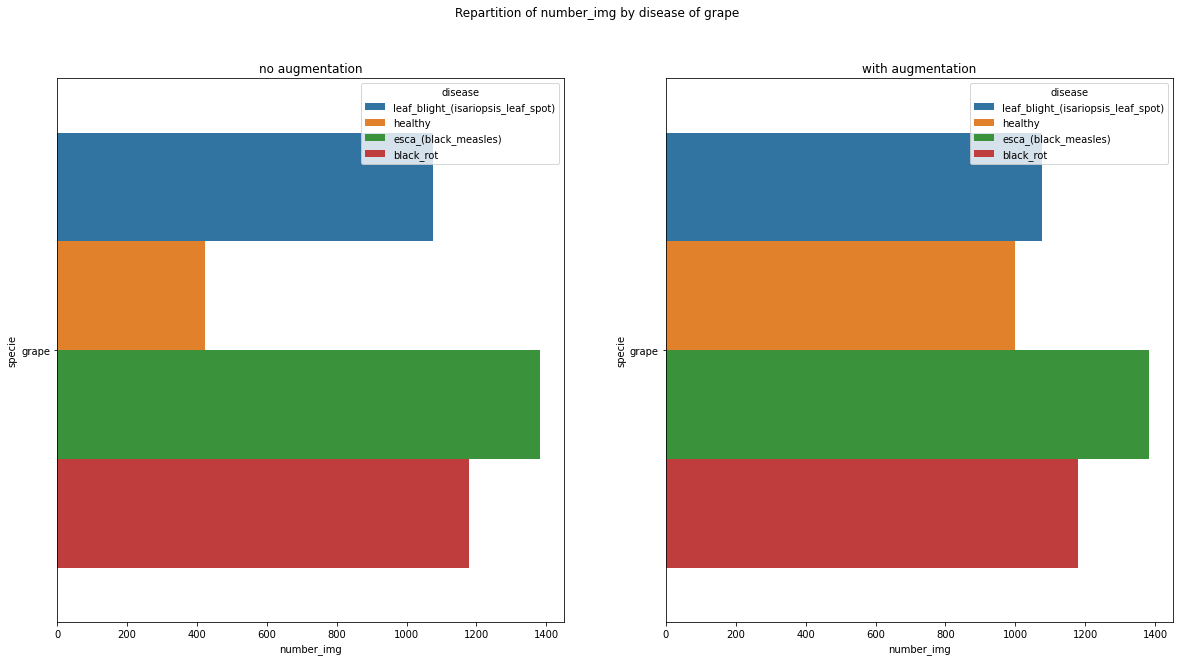

'For potato'

,no_augmentation,augmentation
max,1000,1000
min,152,1000
difference,848,0


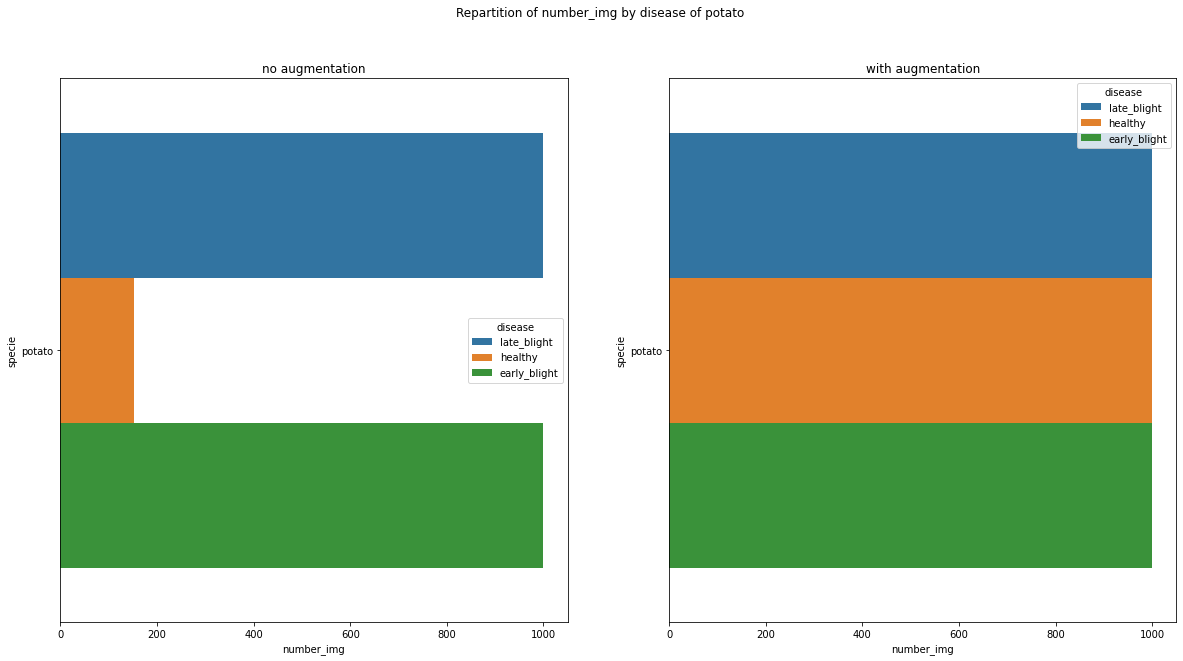

'For pepper,_bell'

,no_augmentation,augmentation
max,1478,1478
min,997,1000
difference,481,478


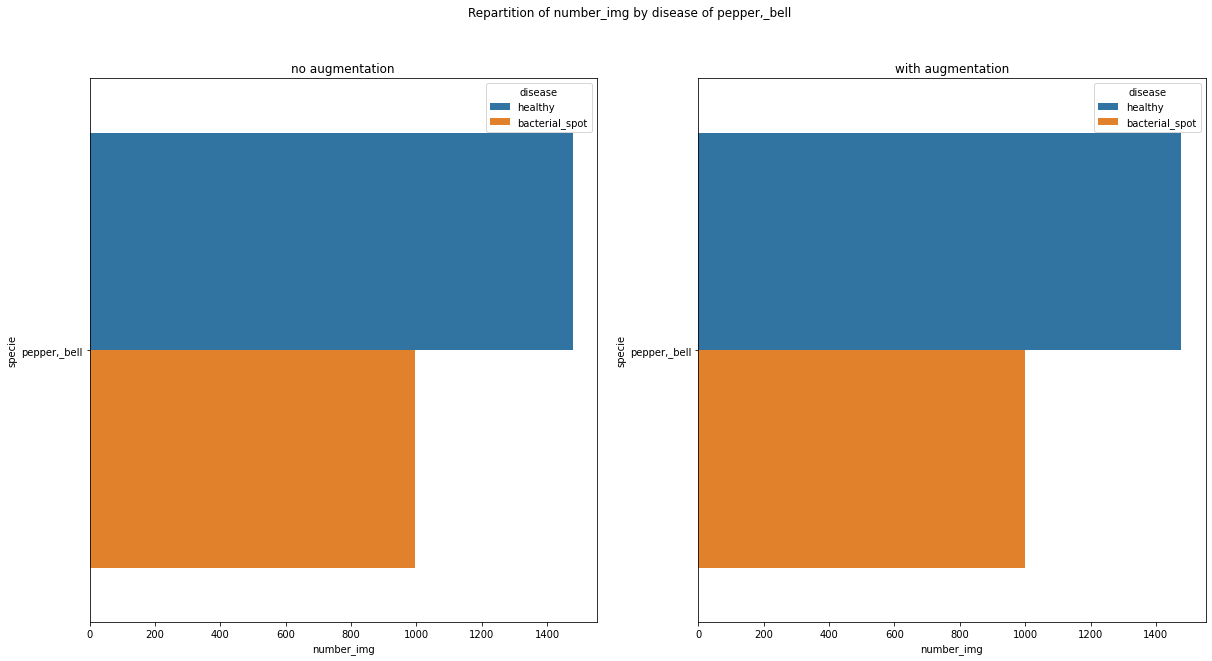

'For apple'

,no_augmentation,augmentation
max,1645,1645
min,275,1000
difference,1370,645


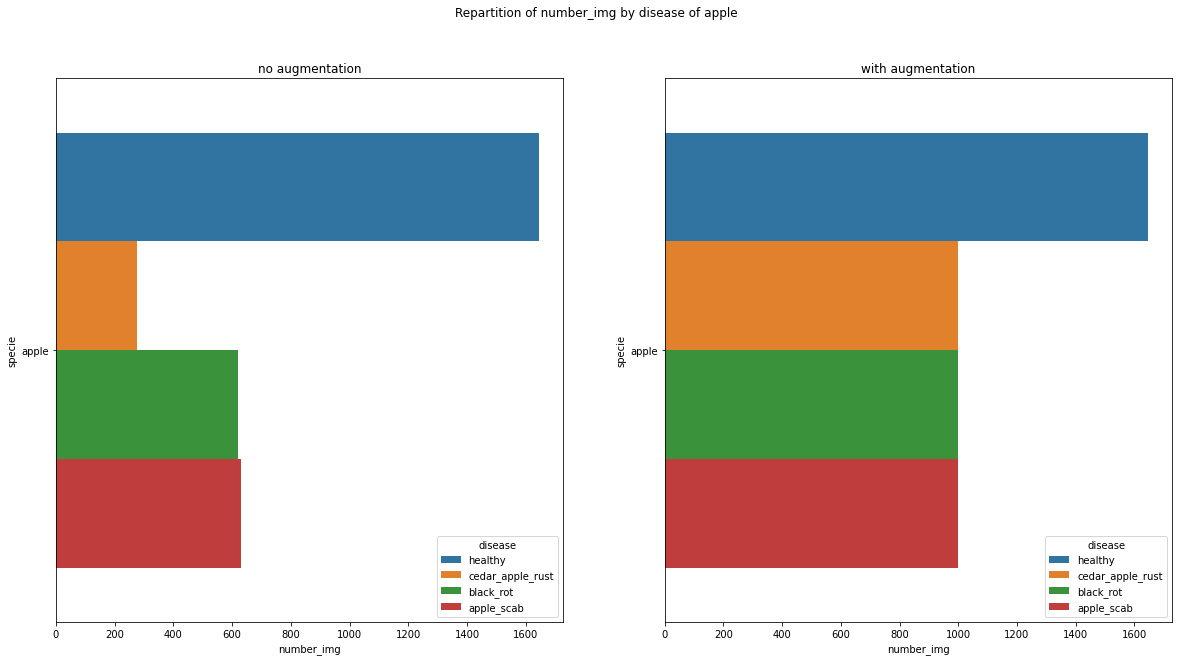

'For peach'

,no_augmentation,augmentation
max,2297,2297
min,360,1000
difference,1937,1297


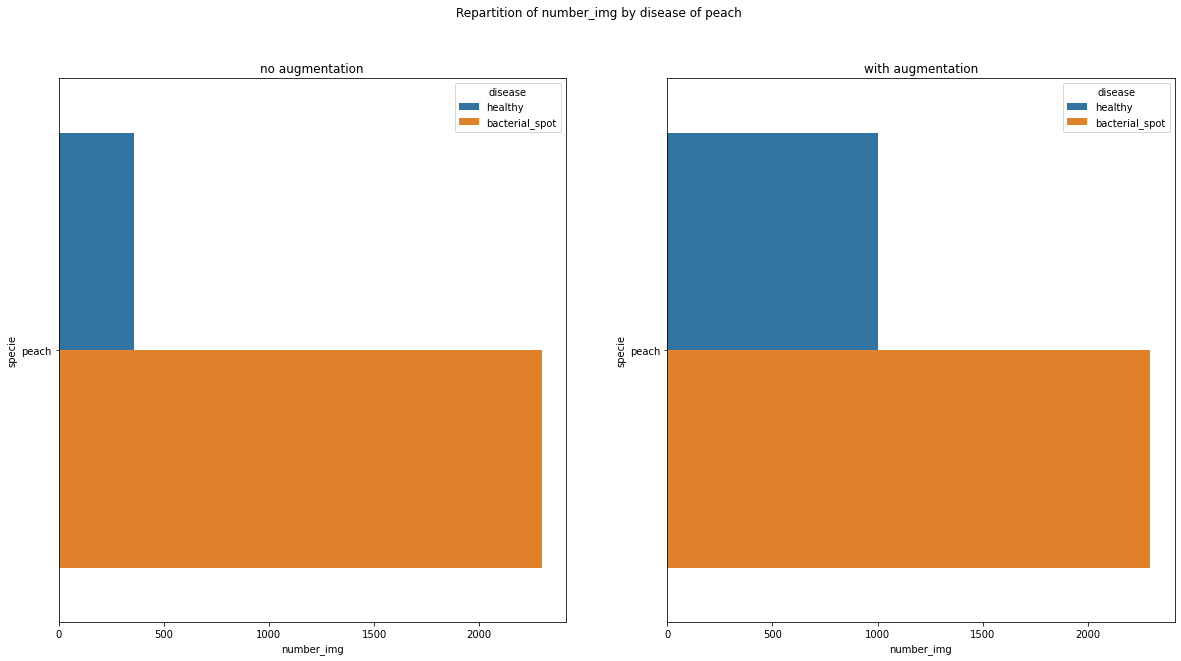

,no_aug_diff,aug_diff
tomato,4984,4357
peach,1937,1297
apple,1370,645
grape,960,383
potato,848,0
corn,679,192
strawberry,653,109
"pepper,_bell",481,478
cherry,198,52


In [6]:
df_no_aug_group_disease = df_no_augmentation.copy()
df_no_aug_group_disease.healthy = df_no_aug_group_disease.healthy.astype(str)
df_no_aug_group_disease = df_no_aug_group_disease.groupby(['specie', 'disease']).sum()
df_no_aug_group_disease.reset_index(inplace=True)
df_no_aug_group_disease = df_no_aug_group_disease.sort_values('disease', ascending=False)

df_aug_group_disease = df_augmentation.copy()
df_aug_group_disease.healthy = df_aug_group_disease.healthy.astype(str)
df_aug_group_disease = df_aug_group_disease.groupby(['specie', 'disease']).sum()
df_aug_group_disease.reset_index(inplace=True)
df_aug_group_disease = df_aug_group_disease.sort_values('disease', ascending=False)


keys = df_no_aug_group_disease.specie.drop_duplicates().reset_index().specie.values
result_stats = {}

for key in keys:
  current_no_df = df_no_aug_group_disease[df_no_aug_group_disease['specie'] == key]
  current_df = df_aug_group_disease[df_no_aug_group_disease['specie'] == key]

  if len(current_df) > 1:
    no_aug_max = current_no_df['number_img'].max() 
    no_aug_min = current_no_df['number_img'].min() 
    no_aug_diff = no_aug_max - no_aug_min

    aug_max = current_df['number_img'].max() 
    aug_min = current_df['number_img'].min() 
    aug_diff = aug_max - aug_min

    data = {
      'no_augmentation': {
        'max': no_aug_max, 'min': no_aug_min, 'difference': no_aug_diff
      },
      'augmentation': {
        'max': aug_max, 'min': aug_min, 'difference': aug_diff
      }
    }
    df_stats = pd.DataFrame(data, columns=['no_augmentation', 'augmentation'], index=['max', 'min', 'difference'])
    display(f"For {key}", df_stats)
    result_stats.update({key: {'no_aug_diff': no_aug_diff, 'aug_diff': aug_diff}})
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    fig.suptitle(f'Repartition of number_img by disease of {key}')

    sns.barplot(ax=axes[0], x="number_img", y="specie", hue="disease", data=current_no_df)
    sns.barplot(ax=axes[1], x="number_img", y="specie", hue="disease", data=current_df)
    axes[0].set_title('no augmentation')
    axes[1].set_title('with augmentation')
    plt.show()
result_stats = pd.DataFrame(result_stats).T.sort_values(by=['no_aug_diff', 'aug_diff'], ascending=False)
display(result_stats)